## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, mean_squared_error, scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def llfun(act, pred):
    """ Logloss function for 1/0 probability
    """
    return (-(~(act == pred)).astype(int) * math.log(1e-15)).sum() / len(act)

## Load the data

In [14]:
train = pd.read_csv("train_modified1.csv")
test = pd.read_csv("test_modified1.csv")

In [15]:
train.head()
#test.head()

Subject_Hotness_Score  Total_Images  Total_Links  \
0               1.108288     -0.639942    -0.383713   
1              -0.999632     -0.639942    -0.860788   
2               1.911305     -0.639942     0.888488   
3              -1.100009     -0.639942    -1.019814   
4               0.405648     -0.639942     0.093362   

   Total_Past_Communications  Word_Count           Email_ID  Email_Status  \
0                   0.345740   -0.961291  EMA00081000034500           0.0   
1                   0.598241    0.958710  EMA00081000066290           1.0   
2                  -0.327597   -0.336004  EMA00081000076560           0.0   
3                  -0.916767    0.903538  EMA00081000109720           0.0   
4                   0.000000   -1.049567  EMA00081000131660           0.0   

   Email_Campaign_Type_1.0  Email_Campaign_Type_2.0  Email_Campaign_Type_3.0  \
0                      0.0                      1.0                      0.0   
1                      0.0                      0.0                      1.0   
2                      0.0                      1.0                      0.0   
3                      0.0                      0.0                      1.0   
4                      0.0                      1.0                      0.0   

          ...           Time_Email_sent_Category_2.0  \
0         ...                                    0.0   
1         ...                                    1.0   
2         ...                                    1.0   
3         ...                                    1.0   
4         ...                                    1.0   

   Time_Email_sent_Category_3.0  Customer_Location_A  Customer_Location_B  \
0                           0.0                  0.0                  0.0   
1                           0.0                  0.0                  1.0   
2                           0.0                  0.0                  0.0   
3                           0.0                  0.0                  0.0   
4                           0.0                  0.0                  0.0   

   Customer_Location_C  Customer_Location_D  Customer_Location_E  \
0                  0.0                  0.0                  1.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   Customer_Location_F  Customer_Location_G  Customer_Location_H  
0                  0.0                  0.0                  0.0  
1                  0.0                  0.0                  0.0  
2                  0.0                  0.0                  0.0  
3                  0.0                  0.0                  0.0  
4                  0.0                  1.0                  0.0  

[5 rows x 25 columns]

In [16]:
target = 'Email_Status'
IDcol = ['Email_ID']
features = [x for x in train.columns if x not in [target]+IDcol]
print(features)

['Subject_Hotness_Score', 'Total_Images', 'Total_Links', 'Total_Past_Communications', 'Word_Count', 'Email_Campaign_Type_1.0', 'Email_Campaign_Type_2.0', 'Email_Campaign_Type_3.0', 'Email_Source_Type_1.0', 'Email_Source_Type_2.0', 'Email_Type_1.0', 'Email_Type_2.0', 'Time_Email_sent_Category_1.0', 'Time_Email_sent_Category_2.0', 'Time_Email_sent_Category_3.0', 'Customer_Location_A', 'Customer_Location_B', 'Customer_Location_C', 'Customer_Location_D', 'Customer_Location_E', 'Customer_Location_F', 'Customer_Location_G', 'Customer_Location_H']


## Partition data

In [17]:
X = train[features]
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

## Logistic Regression

In [8]:
#Logistic Regression
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))])

#c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#c_range = [50, 100, 150, 200]
c_range = [140, 145, 150]

param_grid = [{'clf__C': c_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=1)
gs = gs.fit(X, y)
print( gs.best_score_)
print(gs.best_params_)

gs_train_prediction = gs.predict(X_train)

0.809913244481
{'clf__C': 140}


## Random Forest

In [9]:
#Random Forest
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=1))])

#n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4

n_estimators_range = [200]
max_depth_range = [15]
min_samples_leaf_range = [50]

param_grid = [{'clf__n_estimators': n_estimators_range, 'clf__max_depth': max_depth_range, 
               'clf__min_samples_leaf': min_samples_leaf_range}]

gs = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=4)
gs = gs.fit(X, y)
print( gs.best_score_)
print(gs.best_params_)

0.812736822085
{'clf__min_samples_leaf': 50, 'clf__n_estimators': 200, 'clf__max_depth': 15}


In [8]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=15, min_samples_leaf=50,n_jobs=4, random_state=1)
rfc.fit(X,y)

[  7.90206406e-02   2.04493663e-02   8.15731582e-02   2.75646470e-01
   1.67816625e-01   5.36727541e-02   1.49038069e-01   1.01643184e-01
   7.72165543e-03   8.25547152e-03   1.64668961e-02   1.73588950e-02
   2.64409814e-03   3.67112998e-03   2.47234483e-03   2.47435905e-04
   1.02866512e-03   1.48317563e-03   1.80783720e-03   2.34167099e-03
   1.02050755e-03   4.61994926e-03   0.00000000e+00]


In [11]:
print(np.sort(rfc.feature_importances_))

[  0.00000000e+00   2.47435905e-04   1.02050755e-03   1.02866512e-03
   1.48317563e-03   1.80783720e-03   2.34167099e-03   2.47234483e-03
   2.64409814e-03   3.67112998e-03   4.61994926e-03   7.72165543e-03
   8.25547152e-03   1.64668961e-02   1.73588950e-02   2.04493663e-02
   5.36727541e-02   7.90206406e-02   8.15731582e-02   1.01643184e-01
   1.49038069e-01   1.67816625e-01   2.75646470e-01]


In [53]:
#prediction on test data
test[target] = gs.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_rf_01.csv", index=False)

## Decision Tree

In [86]:
#Decision Tree
pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=1))])

#max_depth=15, min_samples_leaf=100

max_depth_range = [5]
min_samples_leaf_range = [11, 12, 13, 14]

param_grid = [{'clf__max_depth': max_depth_range, 'clf__min_samples_leaf': min_samples_leaf_range}]

gs_dt = GridSearchCV(estimator=pipe_dt, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=3)
dt = gs_dt.fit(X, y)
print( dt.best_score_)
print(dt.best_params_)

0.813468318874
{'clf__max_depth': 5, 'clf__min_samples_leaf': 12}


In [87]:
#prediction on test data
test[target] = dt.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_dt_01.csv", index=False)

## KNN Classifer

In [59]:
# Fit
logloss = []
for i in range(1, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    outcome = knn.predict(X_test)
    
    # Logloss
    logloss.append(llfun(y_test, outcome))

[]

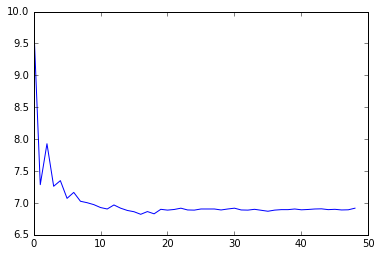

In [60]:
plt.plot(logloss)
plt.plot()
#plt.savefig('n_neighbors_vs_logloss.png')

In [61]:
# Submit for K=40
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [62]:
#prediction on test data
test[target] = knn.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_knn_01.csv", index=False)

## Ensemble of Logistic Regression, Random Forest, KNN

In [94]:
clf1 = LogisticRegression(penalty='l2', C=140, random_state=1)
clf2 = RandomForestClassifier(n_estimators=200,max_depth=15, min_samples_leaf=50,n_jobs=1)
clf3 = KNeighborsClassifier(n_neighbors=18, p=2, metric='minkowski')
clf4 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, random_state=1)

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])

#clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']

#print('10-fold cross validation:\n')
#for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
#    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
#    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

vc_lr_rf_knn = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf4)], voting='hard')
vc_lr_rf_knn.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=140, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFore...split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'))],
         voting='hard', weights=None)

In [98]:
vc_lr_rf_knn.get_params()

{'dt': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=12,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1, splitter='best'),
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': 5,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_samples_leaf': 12,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__presort': False,
 'dt__random_state': 1,
 'dt__splitter': 'best',
 'estimators': [('lr',
   LogisticRegression(C=140, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False)),
  ('rf',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=10, max_fe

In [102]:
params = {'dt__max_depth': [1, 2],
          'lr__C': [0.001, 0.1, 100.0]}

vc_lr_rf_knn_grid = GridSearchCV(estimator=vc_lr_rf_knn, 
                    param_grid=params, 
                    cv=10, 
                    scoring='accuracy')
vc_lr_rf_knn_grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=VotingClassifier(estimators=[('lr', LogisticRegression(C=140, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFore...split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'))],
         voting='hard', weights=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lr__C': [0.001, 0.1, 100.0], 'dt__max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [105]:
vc_lr_rf_knn_grid.best_params_

{'dt__max_depth': 2, 'lr__C': 100.0}

In [103]:
#prediction on test data
test[target] = vc_lr_rf_knn_grid.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_vc_lr_rf_knn_grid_01.csv", index=False)

## Decision Tree with Bagging

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

bag = bag.fit(X, y)

C:\Users\ranjank\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\ranjank\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\ranjank\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np

In [108]:
#prediction on test data
test[target] = bag.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_dt_bag_01.csv", index=False)

## Adaptive Boosting (Adaboost)

In [ ]:
#pipe_dt = Pipeline([('sc', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=1))])

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

ada = AdaBoostClassifier(base_estimator=tree, 
                        n_estimators=572,
                        learning_rate=0.0605,
                        random_state=0)
ada = ada.fit(X, y)

#prediction on test data
test[target] = ada.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_ada_tree_01.csv", index=False)

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [400, 500]
             }


DTC = DecisionTreeClassifier(random_state = 1,max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC = grid_search_ABC.fit(X, y)

#prediction on test data
test[target] = grid_search_ABC.predict(test[features])

#Export submission file:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("model_ada_tree_01.csv", index=False)